# CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras import layers, models

In [2]:
# Define dataset path
dataset_path = r"D:\intel-small"
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(250, 250),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)


val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(250, 250),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 48 images belonging to 6 classes.


Found 12 images belonging to 6 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Input(shape=(250, 250, 3)),
    
    layers.Conv2D(10, (7, 7), strides=(2, 2), padding='valid', activation='relu'),
    
    layers.Conv2D(35, (7, 7), strides=(2, 2), padding='valid', activation='relu'),
    
    layers.MaxPooling2D(pool_size=(5, 5), strides=(5, 5)),
    
    layers.Conv2D(100, (5, 5), strides=(1, 1), padding='valid', activation='relu'),
    
    layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    
    layers.Flatten(),
    
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    
    layers.Dense(6, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 122, 122, 10)   │         1,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 58, 58, 35)     │        17,185 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 11, 11, 35)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 100)      │        87,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 3, 3, 100)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 900)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       230,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 370,591 (1.41 MB)

 Trainable params: 370,591 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


# Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Change to categorical_crossentropy if multi-class
              metrics=['accuracy'])

# Train Model
model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save Model
# model.save("cnn_model.h5")

model.evaluate(train_generator)


Epoch 1/10


c:\Users\sbhar\anaconda3\envs\myenv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.0903 - loss: 2.1336 - val_accuracy: 0.1667 - val_loss: 1.8009
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.2708 - loss: 1.7461 - val_accuracy: 0.1667 - val_loss: 1.8026
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 834ms/step - accuracy: 0.1458 - loss: 1.7469 - val_accuracy: 0.1667 - val_loss: 1.7918
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 873ms/step - accuracy: 0.2153 - loss: 1.7197 - val_accuracy: 0.1667 - val_loss: 1.7825
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 857ms/step - accuracy: 0.2604 - loss: 1.6760 - val_accuracy: 0.1667 - val_loss: 1.7737
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.3681 - loss: 1.5608 - val_accuracy: 0.3333 - val_loss: 1.7750
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 839ms/step - accuracy: 0.5208 - loss: 1.4683 - val_accuracy: 0.3333 - val_loss: 1.7471
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6597 - loss: 1.2235 - val_accuracy: 0.2500 - val_loss: 1.7405
Epoch 9/10
2/2 

[0.355456680059433, 0.9166666865348816]

In [10]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Path to the new image
new_image_path = r"D:\Intel-Image-Data\seg_test\seg_test\street\20126.jpg"
new_image_path = r"D:\Intel-Image-Data\seg_train\seg_train\forest\175.jpg"

# Load and preprocess the image
img = image.load_img(new_image_path, target_size=(250, 250))  # Resize to match model input
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


# Predict class probabilities
predictions = model.predict(img_array)

# Get the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)[0]

# Load class labels
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse mapping

# Print the predicted class
print("Predicted class:", class_labels[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted class: forest


### resnet

In [7]:
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.models import Model 
from tensorflow.keras import models , layers
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D

num_classes = train_generator.num_classes

# base_model_resnet.trainable = False

base_model_resnet = ResNet50(weights=None, include_top=False, input_shape=(250, 250, 3))

resnet_model = models.Sequential([
        base_model_resnet,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax")  # Output layer for num_classes

    ])
# Compile model
resnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,145,926 (92.11 MB)

 Trainable params: 24,092,806 (91.91 MB)

 Non-trainable params: 53,120 (207.50 KB)

### efficient net

In [ ]:
EfficientNetB0

In [ ]:
base_model_efficientnet = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(250, 250, 3))

base_model_efficientnet.trainable = False

efficientnet_model = models.Sequential([

        base_model_efficientnet,

        layers.GlobalAveragePooling2D(),  # Global Average Pooling

        layers.Dense(256, activation="relu"),  # First fully connected layer

        layers.Dense(128, activation="relu"),  # Second fully connected layer

        layers.Dense(num_classes, activation="softmax")  # Output layer for num_classes
    ])

# Compile model
efficientnet_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


efficientnet_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 8, 8, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,411,177 (16.83 MB)

 Trainable params: 361,606 (1.38 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
# Train model
efficientnet_model.fit(train_generator, validation_data=val_generator, epochs=10)

# Save model
# efficientnet_model.save("efficientnet_model.h5")

efficientnet_model.evaluate(train_generator)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 834ms/step - accuracy: 0.1354 - loss: 1.7785 - val_accuracy: 0.1667 - val_loss: 1.7935
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 821ms/step - accuracy: 0.1389 - loss: 1.7943 - val_accuracy: 0.2500 - val_loss: 1.7915
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 841ms/step - accuracy: 0.2326 - loss: 1.7807 - val_accuracy: 0.1667 - val_loss: 1.7949
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 788ms/step - accuracy: 0.1632 - loss: 1.7963 - val_accuracy: 0.2500 - val_loss: 1.7956
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 825ms/step - accuracy: 0.2361 - loss: 1.7959 - val_accuracy: 0.1667 - val_loss: 1.7944
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1597 - loss: 1.7889 - val_accuracy: 0.0000e+00 - val_loss: 1.7900
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 742ms/step - accuracy: 0.0764 - loss: 1.7910 - val_accuracy: 0.1667 - val_loss: 1.7943
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1181 - loss: 1.7913 - val_accuracy: 0.1667 - val_loss: 1

[1.7743215560913086, 0.25]

# yolo

In [29]:
results = model(r"C:\Users\sbhar\Downloads\bus.jpg")


image 1/1 C:\Users\sbhar\Downloads\bus.jpg: 640x480 5 persons, 1 bus, 1 fire hydrant, 802.3ms
Speed: 11.8ms preprocess, 802.3ms inference, 10.6ms postprocess per image at shape (1, 3, 640, 480)


In [6]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 (pretrained on COCO dataset)
model = YOLO("yolov3u.pt")  # 's' = small, 'm' = medium, 'l' = large



image 1/1 C:\Users\sbhar\Downloads\bus.jpg: 640x480 5 persons, 1 bus, 1 fire hydrant, 1062.2ms
Speed: 4.0ms preprocess, 1062.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs\detect\predict3


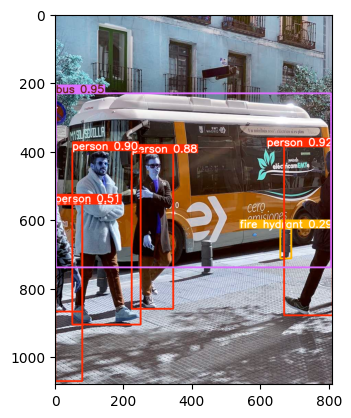

In [5]:
# Perform object detection
results = model(r"C:\Users\sbhar\Downloads\bus.jpg", save=True)

# Show detection results
# results[0].show()
a=results[0].plot()
plt.imshow(a)

In [ ]:
# Run YOLO on a video
results = model("path_to_video.mp4", save=True)

In [ ]:
# Run YOLO on webcam
model.predict(source=0, show=True)